In [1]:
print("Loading vix_utils into a jupyter notebook, and plotting some term structures")

Loading vix_utils into a jupyter notebook, and plotting some term structures


In [2]:
import vix_utils, pandas as pd, logging, asyncio,sys,matplotlib.pyplot as plt, scipy.stats as bc

In [3]:
#in Jupyter, use the vix_utils asynchronous functions to the load the data
#here we read the futures and cash term structure

vix_futures,vix_cash=await asyncio.gather(vix_utils.async_load_vix_term_structure(),vix_utils.async_get_vix_index_histories())


Duplicates detected
                     Trade Date  Weekly  Tenor_Monthly  Tenor_Days  \
38660 2020-02-27 00:00:00-05:00    True            2.0          26   
38661 2020-02-27 00:00:00-05:00    True            2.0          26   
38675 2020-02-28 00:00:00-05:00    True            2.0          25   
38676 2020-02-28 00:00:00-05:00    True            2.0          25   

       Tenor_Trade_Days                    Expiry   Open   High    Low  Close  \
38660              19.0 2020-03-25 00:00:00-04:00  24.15  25.35  22.15  24.25   
38661              19.0 2020-03-25 00:00:00-04:00  24.15  25.35  22.15  24.25   
38675              18.0 2020-03-25 00:00:00-04:00  26.50  27.50  25.65  26.50   
38676              18.0 2020-03-25 00:00:00-04:00  26.50  27.50  25.65  26.50   

       Settle  Change  Total Volume  EFP  Open Interest  Year  MonthOfYear  \
38660  25.025   3.000            48    0             63  2020            3   
38661  25.025   3.000            48    0             63  2020      

In [4]:
#another way, reading the futures, then the cash structure, in sequence instead of concurrently
vix_futures_skinny_2 = await vix_utils.async_load_vix_term_structure()
vix_cash_2=await vix_utils.async_get_vix_index_histories()

In [5]:
    #manipulate the data to get what we want to display
    vix_cash_wide=vix_utils.pivot_cash_term_structure_on_symbol(vix_cash)
    vix_futures_monthly_skinny=vix_utils.select_monthly_futures(vix_futures)
    vix_futures_wide=vix_utils.pivot_futures_on_monthly_tenor(vix_futures_monthly_skinny)
    #we just want 9 tenors for now
    selected_tenors=list(range(1,10))
    original_vix_futures_wide=pd.DataFrame(vix_futures_wide)
    vix_futures_wide=vix_futures_wide[selected_tenors]
    close=vix_futures_wide.swaplevel(0,1,axis=1)[["Close"]]



******************************Duplicates detected for Trade Date and Tenor



In [6]:
close

Close                                                        
Tenor_Monthly    1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0
Trade Date                                                                  
2004-03-26       NaN  20.27  20.20    NaN  20.06    NaN    NaN  20.89    NaN
2004-03-29       NaN  19.77  19.76    NaN  19.76    NaN    NaN  20.97    NaN
2004-03-30       NaN  19.61  19.73    NaN  19.92    NaN    NaN  21.00    NaN
2004-03-31       NaN  19.72  19.90    NaN  20.18    NaN    NaN  21.13    NaN
2004-04-01       NaN  19.65  19.94    NaN  20.28    NaN    NaN  21.25    NaN
...              ...    ...    ...    ...    ...    ...    ...    ...    ...
2023-07-05     15.29  16.50  17.63  18.32  18.81  19.13  20.26  20.53  20.90
2023-07-06     16.25  17.29  18.31  18.93  19.32  19.54  20.65  20.85  21.15
2023-07-07     15.86  16.89  17.94  18.57  19.00  19.25  20.35  20.50  20.77
2023-07-10     15.76  16.75  17.75  18.37  18.85  19.10  20.15  20.32  20.60
2023-07-11     15.45  16.55  17.62  18.22  18.60  18.75  19.85  20.10  20.55

[4846 rows x 9 columns]

<Axes: xlabel='Trade Date'>

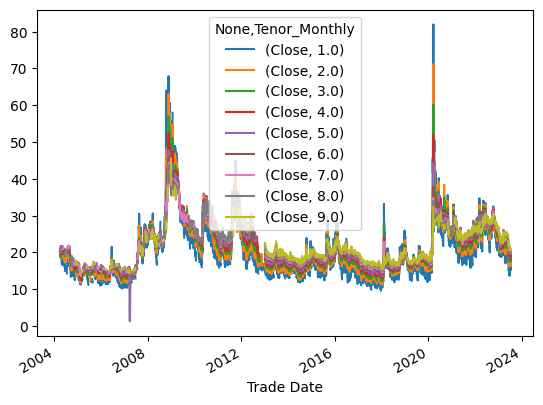

In [7]:
#plot futures
close.plot()

<Axes: xlabel='Trade Date'>

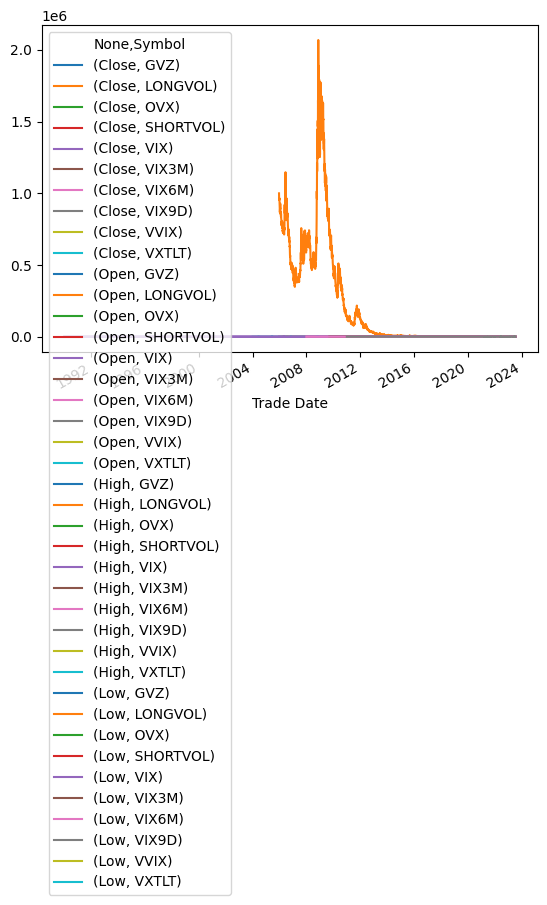

In [8]:
vix_cash_wide.plot()